In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 한글 시각화를 위한 seaborn 폰트설정
plt.rcParams['axes.unicode_minus'] = False
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context='notebook',
              style='darkgrid',
              palette='pastel',
              font='Malgun Gothic',
              rc=custom_params)

## 데이터 불러오기

In [4]:
entry_data = pd.read_csv("entry_data.csv")
sales_data = pd.read_csv("sales_data.csv")
item_data = pd.read_csv("item_data.csv")
item_entry_data = pd.read_csv("item_entry_data.csv")

In [5]:
print(entry_data.info())
entry_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    22292 non-null  object
 1   입실      22555 non-null  object
 2   퇴실      22555 non-null  object
 3   이용      22533 non-null  object
 4   위치      22555 non-null  object
 5   금액      22555 non-null  int64 
 6   구분      22555 non-null  object
 7   고객      22555 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB
None


,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [6]:
print(sales_data.info())
sales_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   결제일시    7105 non-null   object
 1   판매위치    7105 non-null   object
 2   상품명     7105 non-null   object
 3   결제방식    7105 non-null   object
 4   비고      7105 non-null   object
 5   판매수량    7105 non-null   int64 
 6   결제금액    7105 non-null   object
 7   고객      6300 non-null   object
dtypes: int64(1), object(7)
memory usage: 444.2+ KB
None


,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [7]:
print(item_data.info())
item_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      174 non-null    int64 
 1   분류      174 non-null    object
 2   상품명     174 non-null    object
 3   판매금액    174 non-null    object
dtypes: int64(1), object(3)
memory usage: 5.6+ KB
None


,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [8]:
print(item_entry_data.info())
item_entry_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      34 non-null     int64 
 1   분류      34 non-null     object
 2   상품명     34 non-null     object
 3   판매금액    34 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.2+ KB
None


,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


## 데이터 분석하기

* 필수 문제1 : 월별 매출액 추세(sales_data를 이용합니다.)
* 월별 매출액 추세를 집계하고 그 결과를 시각화해봅니다.
* 힌트: groupby() 함수를 사용하세요.

In [9]:
# 문제 1: 월별 매출액 추세
# 활용할 데이터(sales_data)를 temp_var로 정의하기
temp_var = sales_data
# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
temp_var['date'] = sales_data["결제일시"].apply(lambda x: x[:7])
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN,2021-02


In [10]:
# sales_data의 결제금액에 포함된 쉼표(,) 지우기
temp_var["결제금액"] = temp_var["결제금액"].str.replace(",","")
# sales_data의 결제금액을 숫자형태로 바꾸기
temp_var['결제금액'] = temp_var['결제금액'].astype('int')
# temp_var의 payment열을 date 기준으로 집계하기
payment_data = temp_var.groupby('date')['결제금액'].sum().reset_index()
payment_data

,date,결제금액
0,2021-02,7000
1,2021-03,2104500
2,2021-04,3116600
3,2021-05,2537000
4,2021-06,3621500
5,2021-07,1215000
6,2021-08,1229000
7,2021-09,1197500
8,2021-10,2138500
9,2021-11,2748500


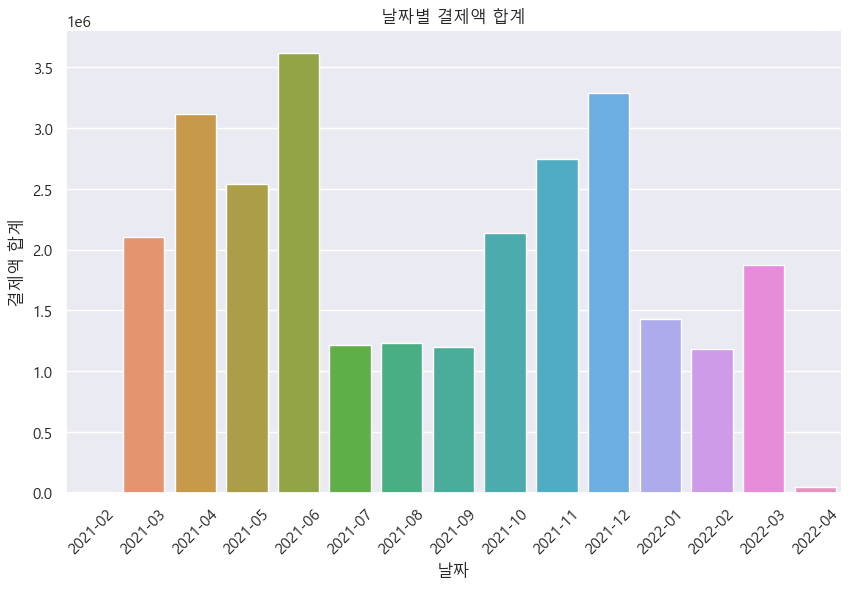

In [11]:
# 집계 결과를 시각화하기
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_data, x='date', y='결제금액')
plt.xlabel('날짜')
plt.ylabel('결제액 합계')
plt.xticks(rotation=45)
plt.title('날짜별 결제액 합계')
plt.show()

* 필수 문제2: 가장 인기 있는 음식/음료(sales_data를 이용합니다.)
* 여러 메뉴들(음식,음료)을 판매 개수 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
* 힌트: value_counts() 함수를 사용하세요.

In [12]:
# 문제 2: 가장 인기 있는 음식/음료
# temp_var의 상품명을 value_counts를 이용해 집계하기
# 주의! value_counts로 바로 집계하면 판매취소와 결제취소가 함께 집계됩니다.
# 따라서 '판매수량' 칼럼 값이 '-1'인 데이터를 제외하고 집계해야 합니다.
temp_var = temp_var[temp_var['판매수량'] > -1]
x = temp_var['상품명'].value_counts()
# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
items_count = pd.DataFrame(x)
temp_item = items_count.head(10)
temp_item

,count
상품명,
김치볶음밥,1204
라면,749
짜장라면,455
치즈불고기볶음밥,420
계란추가,314
낙지볶음밥,312
새우볶음밥,309
아메리카노(ICE),284
치즈감자튀김,246


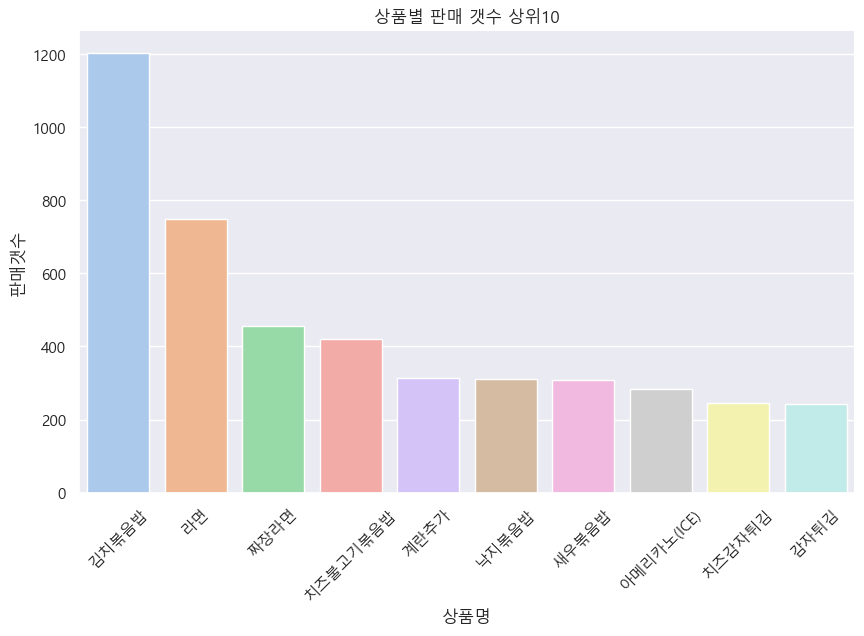

In [13]:
# 집계 결과 시각화하기
plt.figure(figsize=(10, 6))
sns.barplot(data=temp_item, x=temp_item.index, y='count')
plt.xlabel('상품명')
plt.ylabel('판매갯수')
plt.xticks(rotation=45)
plt.title('상품별 판매 갯수 상위10')
plt.show()

In [14]:
# temp_var의 payment열을 상품명을 기준으로 집계하기
items_payment = temp_var.groupby('상품명')['결제금액'].sum().reset_index()
# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
items_payment = items_payment.sort_values(by='결제금액', ascending=False).reset_index(drop=True)
temp_payment = items_payment.head(10)
temp_payment

,상품명,결제금액
0,김치볶음밥,6004400
1,라면,2941500
2,치즈불고기볶음밥,2292600
3,짜장라면,2038500
4,낙지볶음밥,1710700
5,새우볶음밥,1539800
6,치즈감자튀김,1354200
7,감자튀김,1083800
8,아메리카노(ICE),1058100
9,불닭볶음면,693000


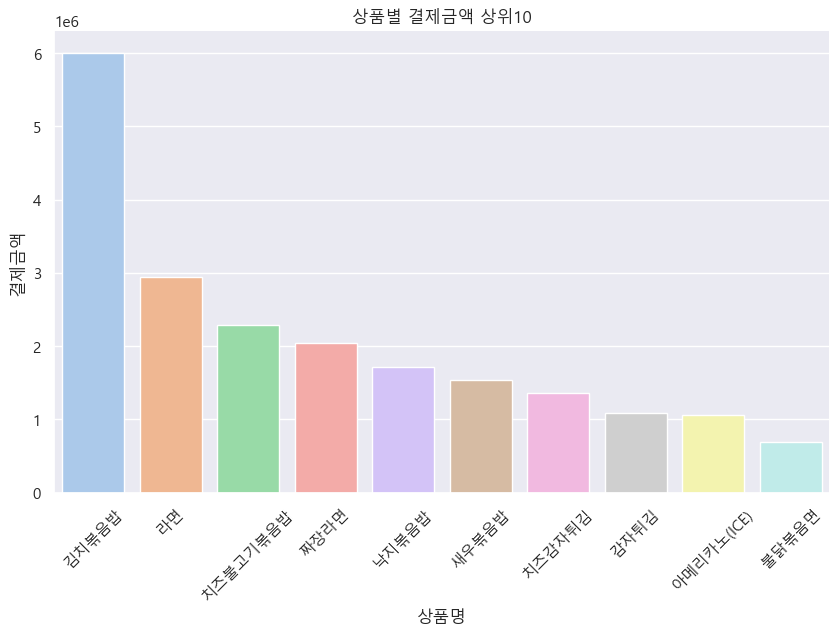

In [15]:
# 집계 결과 시각화하기
plt.figure(figsize=(10, 6))
sns.barplot(data=temp_payment, x='상품명', y='결제금액')
plt.xlabel('상품명')
plt.ylabel('결제금액')
plt.xticks(rotation=45)
plt.title('상품별 결제금액 상위10')
plt.show()

* 필수 문제3: 가장 많이 팔린 입장권 종류(entry_data를 이용합니다.)
* 여러 입장권 종류를 판매 매출(판매 개수 x 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
* 힌트: value_counts() 함수를 사용하세요.

In [16]:
# 활용할 데이터(entry_data)를 temp_var로 정의하기
temp_var = entry_data
temp_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    22292 non-null  object
 1   입실      22555 non-null  object
 2   퇴실      22555 non-null  object
 3   이용      22533 non-null  object
 4   위치      22555 non-null  object
 5   금액      22555 non-null  int64 
 6   구분      22555 non-null  object
 7   고객      22555 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


In [17]:
# temp_var의 금액을 숫자형태로 변환하기
temp_var['금액'] = temp_var['금액'].astype('int')
# temp_var의 금액을 요금제명을 기준으로 집계하기
tickets= temp_var.groupby('요금제명')['금액'].sum().reset_index()
# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
temp_tickets = tickets.sort_values(by='금액', ascending=False).reset_index(drop=True).head(10)
temp_tickets

,요금제명,금액
0,한국대생 입장권(종일권),70037000
1,입장권(종일권),23570500
2,심야-조조무제한(06시까지),11600000
3,심야-조조무제한,6221000
4,한국대생 무제한 입장권,5207500
5,시간요금제(1시간),2665500
6,시간요금제(3시간),2042000
7,무제한 입장권,1568600
8,18시이후 무제한,1330500
9,조조무제한,693000


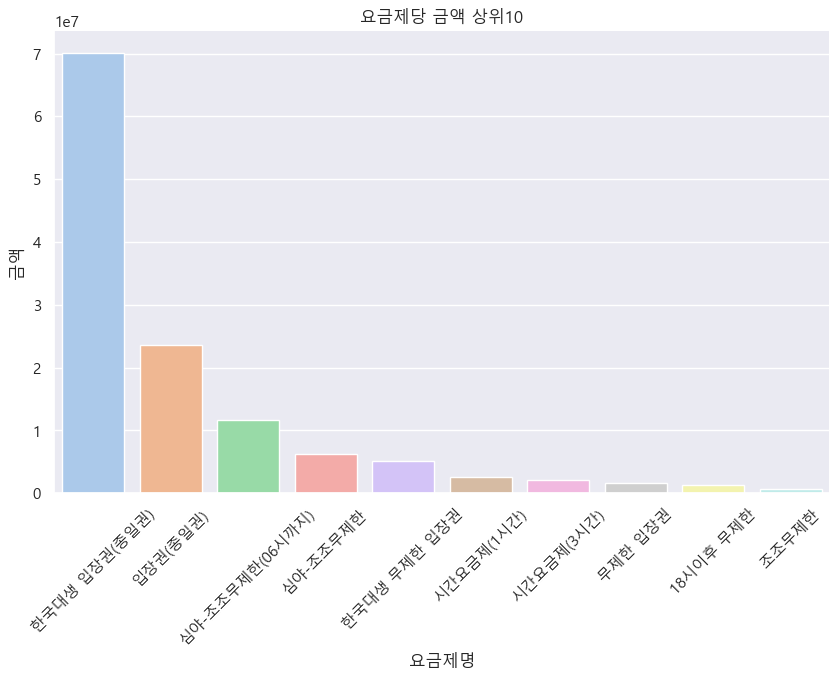

In [18]:
# 집계 결과 시각화하기
plt.figure(figsize=(10, 6))
sns.barplot(data=temp_tickets, x='요금제명', y='금액')
plt.xlabel('요금제명')
plt.ylabel('금액')
plt.xticks(rotation=45)
plt.title('요금제당 금액 상위10')
plt.show()

## 임의 문제 정의단계
##### 1. 시간대별 결제금액 총합
* 날짜별이 아닌 시간대별 결제금액확인
* 데이터 확인 결과 모든 결제는 선결제가 이루어지기 때문에 결제 시간은 고객 입점 시간임
* 결제 시간을 기준으로 결제 금액 총합을 확인하여 어느 시간대에 고객이 가장많이 몰리는지 확인하기

In [19]:
temp_var = sales_data
# 원본데이터에서 "결제시간"부분만 따와서 새로운 칼럼 생성
temp_var['time'] = sales_data["결제일시"].apply(lambda x: x[11:13])
print(temp_var.info())
temp_var.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   결제일시    7105 non-null   object
 1   판매위치    7105 non-null   object
 2   상품명     7105 non-null   object
 3   결제방식    7105 non-null   object
 4   비고      7105 non-null   object
 5   판매수량    7105 non-null   int64 
 6   결제금액    7105 non-null   int32 
 7   고객      6300 non-null   object
 8   date    7105 non-null   object
 9   time    7105 non-null   object
dtypes: int32(1), int64(1), object(8)
memory usage: 527.5+ KB
None


,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date,time
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04,19
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04,19
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04,19
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04,19
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04,19


In [20]:
# 위에 나와있듯 판매수량이 -1은 합계에 넣지않음
temp_var = temp_var[temp_var['판매수량'] > -1]
# time을 기준으로 결제금액 합계 도출
time_sum = temp_var.groupby('time')['결제금액'].sum().reset_index()
time_sum

,time,결제금액
0,00,499500
1,07,16500
2,09,49500
3,10,1076600
4,11,1630800
5,12,2012600
6,13,1943300
7,14,1729200
8,15,2233700
9,16,2338700


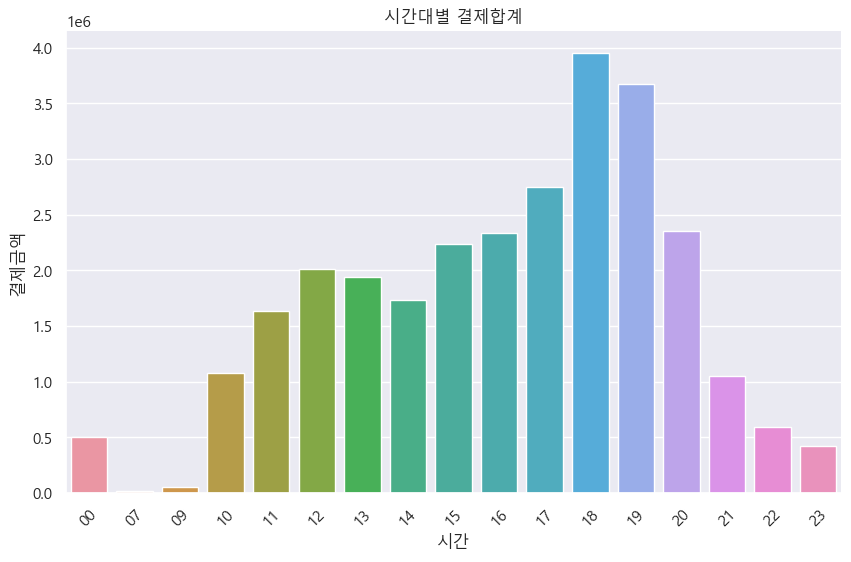

In [21]:
# 데이터 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=time_sum, x='time', y='결제금액')
plt.xlabel('시간')
plt.ylabel('결제금액')
plt.xticks(rotation=45)
plt.title('시간대별 결제합계')
plt.show()

* 시간대별 확인결과 저녁시간대에 고객이 가장 많이 몰리는것을 확인할 수 있음
* 20시 부터 고객이 많이 줄기 때문에, 20시~24시에는 디저트 프로모션이나 음료 프로모션을 진행하여 해당 시간에 고객의 입점 수 증가 기대가능

##### 2.분류별 매출 합계 도출
* 현재 매출 금액중 가장 많은 부분을 담당하는 '종류'만을 구하기
* 저녁 시간대에 많이 몰리는 것을 확인한 결과, 현재 카페에서 고객들이 선호하는 종류 파악 필요

In [22]:
temp_data = sales_data[sales_data["판매수량"] > -1]
# 상풍명을 기준으로 두개의 데이터를 합치면, 상품명에따른 분류가 자동적으로 생성됨
temp_data = pd.merge(temp_data, item_data, on="상품명")
# 판매금액 과 결제금액 의 차이를 확실하게 구분해야 함.
print(temp_data.columns)
temp_data.head()

Index(['결제일시', '판매위치', '상품명', '결제방식', '비고', '판매수량', '결제금액', '고객', 'date',
       'time', '구분', '분류', '판매금액'],
      dtype='object')


,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date,time,구분,분류,판매금액
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04,19,68,음식,"4,500원"
1,2022-03-31 14:51,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer751113,2022-03,14,68,음식,"4,500원"
2,2022-03-24 21:35,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer901892,2022-03,21,68,음식,"4,500원"
3,2022-03-12 17:42,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer339975,2022-03,17,68,음식,"4,500원"
4,2022-03-05 19:56,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer301352,2022-03,19,68,음식,"4,500원"


In [23]:
# 위의 데이터에서 분류를 기준으로 결제금액 합계 구하기
category = temp_data.groupby('분류')['결제금액'].sum().reset_index()
category = category.sort_values(by='결제금액', ascending=False).reset_index(drop=True)
category

,분류,결제금액
0,음식,88620600
1,커피,8366000
2,차가운음료(커피외),4656500
3,디저트,2394500
4,스무디&쉐이크,1574400
5,따뜻한음료(커피외),485900
6,포장,34000
7,게임&TV,3000


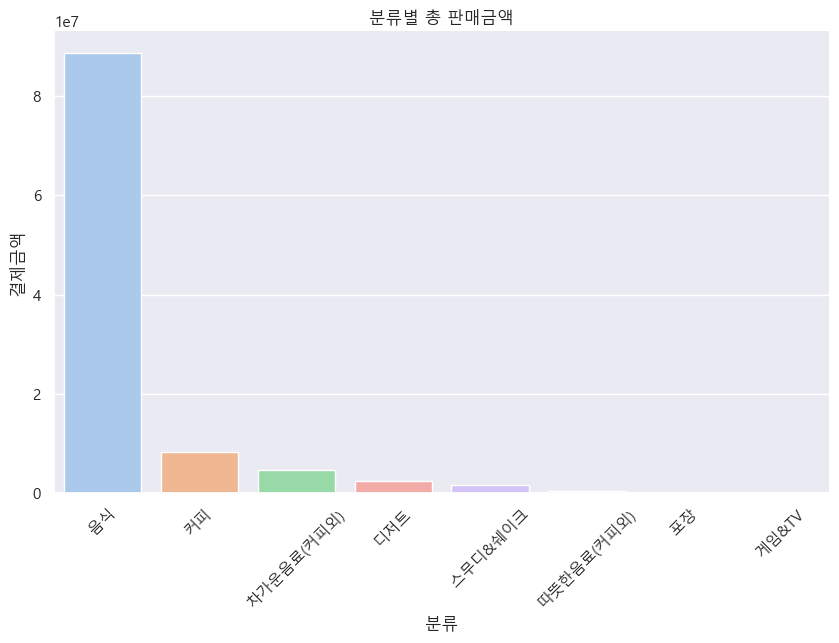

In [24]:
# 데이터 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=category, x='분류', y='결제금액')
plt.xlabel('분류')
plt.ylabel('결제금액')
plt.xticks(rotation=45)
plt.title('분류별 총 판매금액')
plt.show()

* 시각화로 확인해보니 음식종류가 매출의 90% 정도
* 카페와 맞지 않는 카테고리가 있고, 해당 카테고리의 매출금액은 있으나 없으나 수준
* 매출의 실질적인 향상을 위해서는 음료 부분에서 개선의 필요함

##### 3.카페의 특정종류만 골라서 시간대별 매출 확인하기
* 세부적인 매출 파악을 위해 매출의 대부분을 담당하는 음식중류를 제외
* 의미가 없어 보이는 분류를 제외하여 실제 매출상승의 기대가 있는 분류만 선정해서 시간대별 파악
* 20시이후에 매출이 줄어듦으로 보아 20시 이후의 인기 품목이 무엇인지 파악하기 위함

In [25]:
# 시각화 하였을때 분석에 방해되는 종류들 제외
none_meal = temp_data[temp_data["분류"] != '음식']
none_meal = none_meal[none_meal["분류"] != '포장']
none_meal = none_meal[none_meal["분류"] != '게임&TV']
none_meal

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date,time,구분,분류,판매금액
3070,2022-04-01 15:19,선불기1,아이스티,신용카드,결제완료,1,3900,customer630809,2022-04,15,109,차가운음료(커피외),"3,500원"
3071,2022-04-01 15:19,선불기1,아이스티,신용카드,결제완료,1,3900,customer630809,2022-04,15,128,차가운음료(커피외),"1,000원"
3072,2022-04-01 15:19,선불기1,아이스티,신용카드,결제완료,1,3900,customer630809,2022-04,15,136,차가운음료(커피외),"3,900원"
3073,2022-03-26 17:25,선불기1,아이스티,신용카드,결제완료,1,3900,customer994026,2022-03,17,109,차가운음료(커피외),"3,500원"
3074,2022-03-26 17:25,선불기1,아이스티,신용카드,결제완료,1,3900,customer994026,2022-03,17,128,차가운음료(커피외),"1,000원"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23614,2021-07-01 17:16,선불기1,카라멜마끼아또(ICE),신용카드,결제완료,1,5000,customer536579,2021-07,17,159,커피,"5,000원"
23615,2021-07-01 16:36,선불기1,카라멜마끼아또(ICE),신용카드,결제완료,1,5000,customer917331,2021-07,16,159,커피,"5,000원"
23616,2021-06-05 20:36,선불기1,카라멜마끼아또(ICE),신용카드,결제완료,1,5000,customer910882,2021-06,20,159,커피,"5,000원"
23617,2021-04-17 13:07,선불기1,카라멜마끼아또(ICE),신용카드,결제완료,1,5000,customer742878,2021-04,13,159,커피,"5,000원"


In [26]:
# 시간과 분류별을 기준으로 결제금액 합계 구하기
drink = none_meal.groupby(['time','분류'])['결제금액'].sum().reset_index()
drink.head()

,time,분류,결제금액
0,00,디저트,70000
1,00,따뜻한음료(커피외),8000
2,00,스무디&쉐이크,11000
3,00,차가운음료(커피외),8500
4,00,커피,285000


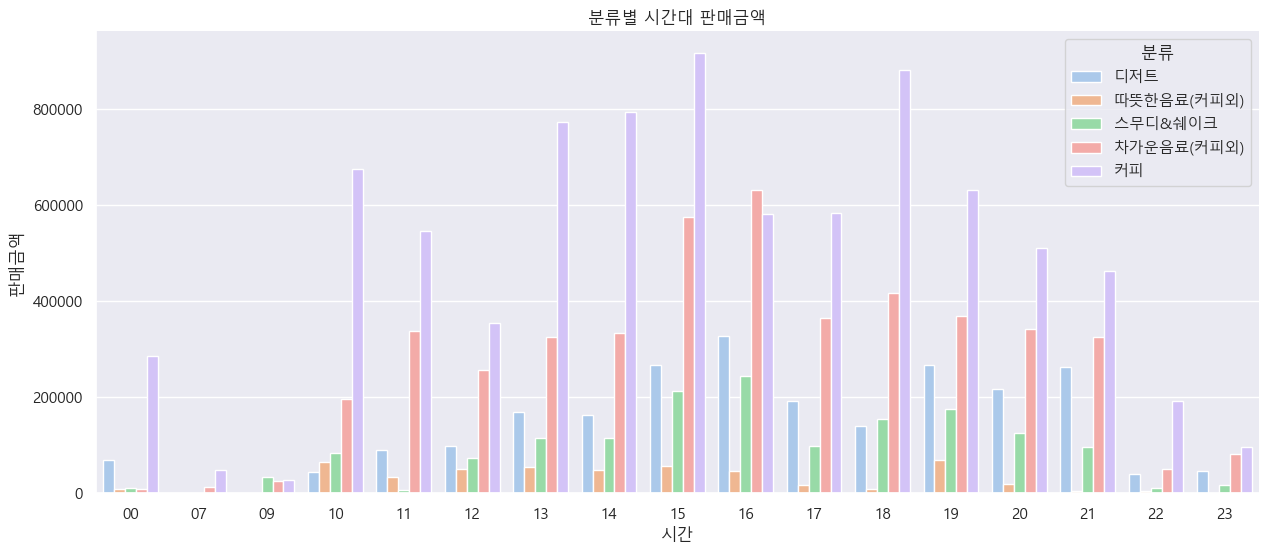

In [27]:
# 데이터 시각화
plt.figure(figsize=(15, 6))
sns.barplot(data=drink, x='time', y='결제금액', hue='분류')
plt.xlabel('시간')
plt.ylabel('판매금액')
plt.title('분류별 시간대 판매금액')
plt.show()

* 16시에 커피의 판매량이 줄고 디저트의 판매량이 비교적 올라간것으로 보아 식사 시간대가아닌때에는 디저트의 수요가 확실히 있음
* 20시 이후로는 커피의 판매량이 현저히 줄어들지만 디저트를 포함한 다른 품목들은 줄지 않음

##### 4.세부메뉴 조정
* 이전 분석에서 확인했듯이 필요없어 보이는 판매품목이 존재함
* 왜 필요없는지에 대한 증거로 시각화를 제시
* 디저트종류에서 인기있는 메뉴를 확인 후 해당 종류의 디저트 메뉴를 추가로 구상할 필요가 있어보임

In [28]:
# 분류별 매출 합계 도출
category.drop(0,axis=0)

,분류,결제금액
1,커피,8366000
2,차가운음료(커피외),4656500
3,디저트,2394500
4,스무디&쉐이크,1574400
5,따뜻한음료(커피외),485900
6,포장,34000
7,게임&TV,3000


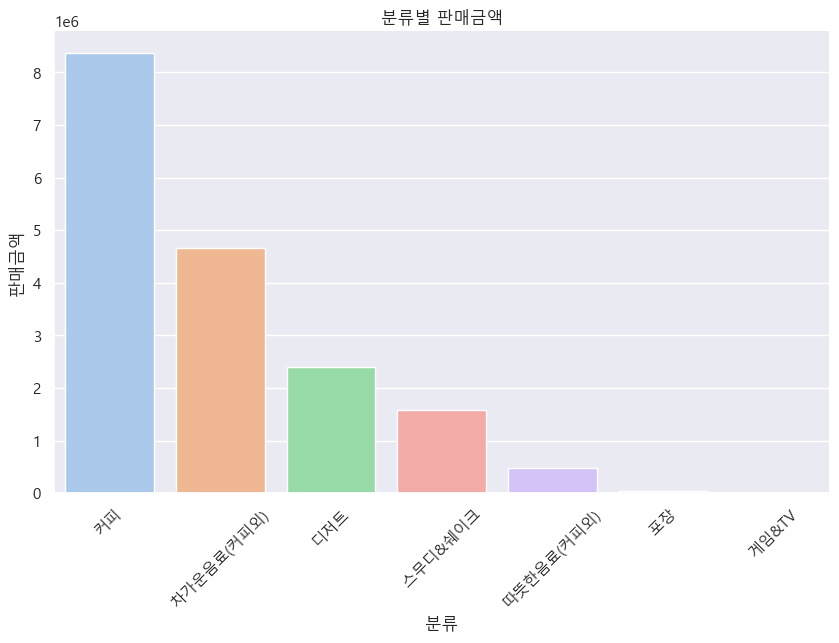

In [29]:
# 데이터 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=category.drop(0,axis=0), x='분류', y='결제금액')
plt.xlabel('분류')
plt.ylabel('판매금액')
plt.title('분류별 판매금액')
plt.xticks(rotation=45)
plt.show()

* 시각화 확인 결과 판매품목에도 오류가 존재한다고 볼 수 있음

In [36]:
# 해당 분류 품목들 확인
item_data[item_data['분류'] == '게임&TV']

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"


In [31]:
item_data[item_data['분류'] == '포장']

,구분,분류,상품명,판매금액
171,172,포장,오늘은 순살닭다리 덮밥,"9,000원"
172,173,포장,오늘은 한돈간장불고기,"8,000원"
173,174,포장,오늘은 한돈고추장불고기,"8,000원"


* '게임&TV','포장' 카테고리는 과감히 삭제하여 해당 업무에 들일 자원을 좀더 효율적으로 사용하는것이 좋아보임
* 예를 들어 성장기대치가 높은 '디저트'품목에서의 고객이 선호하는 메뉴를 선정해 헤당 메뉴와 비슷한 메뉴를 추가로 만들기가 있음
* 디저트 품목에서 고객선호도가 높은 메뉴를 선정해보기

In [32]:
# 가장 많이 팔린 디저트류 내림차순으로 출력하기
# 분류에서 디저트에 해당되는 데이터만 추출
desserts = none_meal[none_meal['분류'] == '디저트'].reset_index(drop=True)
desserts_sum = desserts.groupby('상품명')['결제금액'].sum().reset_index()
desserts_sum = desserts_sum.sort_values(by='결제금액', ascending=False).reset_index(drop=True)
desserts_sum

,상품명,결제금액
0,초코머핀,588000
1,치즈케이크,545000
2,블루베리머핀,367000
3,쿠키(초코칩),350000
4,미니마카롱(3개),276000
5,쿠키(마카다미아),108000
6,크로플,99000
7,쿠키(오트밀),61500


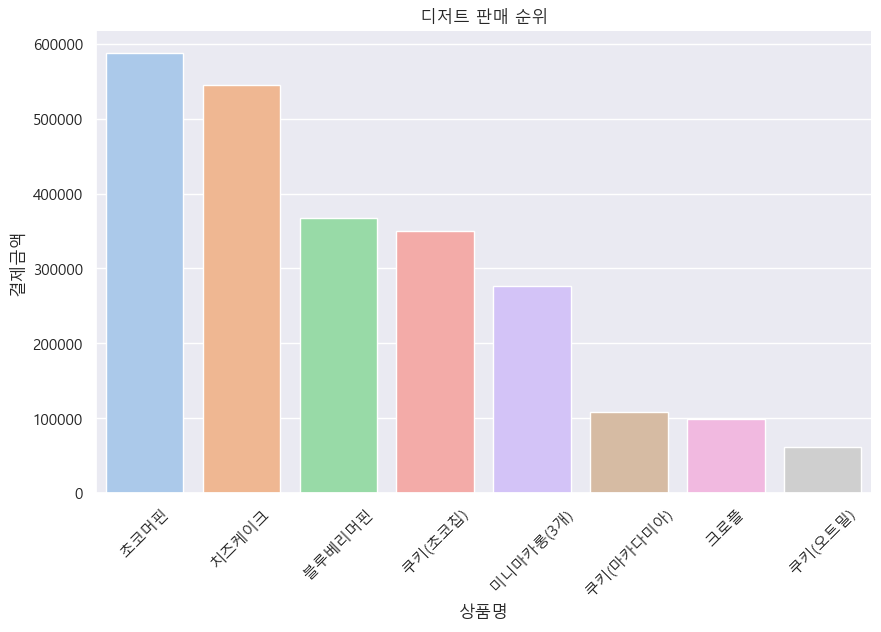

In [33]:
# 데이터 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=desserts_sum, x='상품명', y='결제금액')
plt.xlabel('상품명')
plt.ylabel('결제금액')
plt.title('디저트 판매 순위')
plt.xticks(rotation=45)
plt.show()

* 머핀,케이크류가 인기가 있으나 판매하는 메뉴가 매우 한정적임
* 해당메뉴가 인기가 있는 이유가 맛에의한건지 식사대용으로 먹기위함인지 파악한 후, 해당 근거에 맞는 디저트류 메뉴 추가 개발 필요

In [34]:
# 판매 디저트메뉴와 전체 디저트메뉴의 품목 전체 갯수 파악하기
desserts_total = item_data[item_data['분류'] == '디저트']
desserts_total

,구분,분류,상품명,판매금액
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"
5,6,디저트,치즈케이크,"4,000원"
6,7,디저트,블루베리머핀,"3,500원"
7,8,디저트,쿠키(오트밀),"1,500원"
8,9,디저트,크로플,"5,500원"
9,10,디저트,치즈케이크,"1,500원"
10,11,디저트,미니마카롱(3개),"1,500원"


In [35]:
# 같은 메뉴로 가격이 다른것은 제외하고 한번이라도 팔린 메뉴와 전체 메뉴의 고유값 확인
print(sorted(list(desserts_sum['상품명'])))
print(sorted(list(desserts_total['상품명'].unique())))

['미니마카롱(3개)', '블루베리머핀', '초코머핀', '치즈케이크', '쿠키(마카다미아)', '쿠키(오트밀)', '쿠키(초코칩)', '크로플']
['미니마카롱(3개)', '블루베리머핀', '초코머핀', '치즈케이크', '쿠키(마카다미아)', '쿠키(오트밀)', '쿠키(초코칩)', '크로플']


* 디저트의 총 메뉴는 8개 이므로 다른 분류들에 비해 종류가 부족해보임 지속적인 매출 향상을 위해서는 선호하는 디저트류를 늘리기를 추천함.

## 회고

---

### 프로젝트 목표
1. 필수 문제 세 가지를 해결하였는가?
* 데이터 전처리 후, 시각화 도구를 사용하여 문제를 해결함
2. 프로젝트롤 통해 해결하고 싶은 문제를 정의하였는가?
* 제공된 데이터를 기반으로 문제해결에 필요한 부분을 선별한 후, 데이터 전처리 및 시각화를 완료하였음
3. 내가 정의한 문제를 해결하려고 하였고, 적절한 결과를 도출 하였는가?
* 스스로 정의한 문제에 대한 인사이트를 도출함.

### 추가 정의 문제
1. 시간대별 결제 총합을 구한 후, 고객이 가장 많이 몰리는 시간대 파악
2. 판매 데이터에서 분류별로 묶은후 합계 도출 한 후, 매출에 상관없는 메뉴 등 파악
3. 카페의 음료 종류만 골라 시간대별 판매금액 확인 후, 음료메뉴의 세부사항 조절
4. 종합적인 메뉴 수정 및 수정 가이드 제공하기
5. 고객아이디를 기준으로 등급별 군집화 해보기

### 총평
* 이번 프로젝트에서는 데이터 시각화 위주였기 때문에, 시각화를 위한 데이터 전처리를 공부를 할 수 있었다.
* 다른 교육 과정과는 다르게 스스로 문제를 정의하는 부분이 있어 생소하지만 데이터에 대한 심화적인 생각을 할 수 있었다.
* 문제를 스스로 정의하며 하고 싶은 시도는 많았지만 시간 및 데이터 전처리에 대한 정보 부족으로 인해 내가 생각하는것을 모두 구현해 보지 못함.
* 이번 제공 데이터는 데이터에대한 설명이 부족하여, 데이터가 무엇을 뜻하는지 전체적으로 알 수 없는 부분이 너무 많았기에 데이터에 대한 아쉬움이 있음.
* 고객을 클래스별로 군집화를 진행하였으나, 적절하지 못한 방법도 있었기에 다양한 방법으로 시도하여 오히려 더 보기 좋은 결과를 도출해낸 부분에 있어 개인적으로 공부가 되었음.